In [1]:

import ctypes
import ctypes.util
import os
from optparse import OptionParser
import time
import re

import matplotlib.pyplot as plt
import numpy as np
import spacepy.toolbox as tb
import spacepy.datamodel as dm
import spacepy.pycdf as pycdf
import spacepy.plot as spp

%matplotlib inline

This unreleased version of SpacePy is not supported by the SpacePy team.


/Users/blarsen/miniconda3/envs/python2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
fname = 'rbspa_ect-hope-sci-L3tagged_20150101_v1.0.0.cdf'

In [3]:
d = dm.fromCDF(fname)

In [4]:
d.tree(verbose=1)

+
|____B_Calc_Ele (spacepy.pycdf.VarCopy (0,))
|____B_Calc_Ion (spacepy.pycdf.VarCopy (0,))
|____B_Eq_Ele (spacepy.pycdf.VarCopy (0,))
|____B_Eq_Ion (spacepy.pycdf.VarCopy (0,))
|____Counts_E (spacepy.pycdf.VarCopy (4143, 5, 16, 72))
|____Counts_H (spacepy.pycdf.VarCopy (3469, 5, 16, 72))
|____Counts_He (spacepy.pycdf.VarCopy (3469, 5, 16, 72))
|____Counts_O (spacepy.pycdf.VarCopy (3469, 5, 16, 72))
|____ENERGY_Ele_DELTA (spacepy.pycdf.VarCopy (4143, 72))
|____ENERGY_Ion_DELTA (spacepy.pycdf.VarCopy (3469, 72))
|____Ele_SAMPLES (spacepy.pycdf.VarCopy (0, 5, 16, 72))
|____Energy_LABL (spacepy.pycdf.VarCopy (72,))
|____Epoch_Ele (spacepy.pycdf.VarCopy (4143,))
|____Epoch_Ele_DELTA (spacepy.pycdf.VarCopy (4143,))
|____Epoch_Ele_Full (spacepy.pycdf.VarCopy (4143, 16, 72))
|____Epoch_Ion (spacepy.pycdf.VarCopy (3469,))
|____Epoch_Ion_DELTA (spacepy.pycdf.VarCopy (3469,))
|____Epoch_Ion_Full (spacepy.pycdf.VarCopy (3469, 16, 72))
|____FEDU (spacepy.pycdf.VarCopy (4143, 5, 16, 72))
|____FHEDU

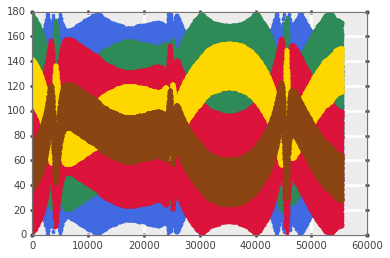

In [5]:
plt.plot(d['PA_Ion'][:,2,:,50].flatten(),'.')
plt.plot(d['PA_Ion'][:,1,:,50].flatten(),'.')
plt.plot(d['PA_Ion'][:,3,:,50].flatten(),'.')
plt.plot(d['PA_Ion'][:,0,:,50].flatten(),'.')
plt.plot(d['PA_Ion'][:,4,:,50].flatten(),'.')


## Make a PA flux plot

In [6]:
import bisect
import datetime

# get the tind
dt = datetime.datetime(2015, 1, 1, 13, 30, 0)
# dt = datetime.datetime(2015, 1, 1, 4, 20, 0)
# dt = datetime.datetime(2015, 1, 1, 3, 0, 0)
t_ind = bisect.bisect(d['Epoch_Ion'], dt)
print(d['Epoch_Ion'][t_ind])
e_ind = 60
print(d['HOPE_ENERGY_Ion'][t_ind][e_ind], t_ind)


2015-01-01 13:30:28.986000
(9631.8994, 1972)


In [7]:
X = d['PHI_Ion'][t_ind:t_ind+10,2,:,e_ind]
Y = d['PA_Ion'][t_ind:t_ind+10,2,:,e_ind]
Z = d['Counts_H'][t_ind:t_ind+10,2,:,e_ind]
print(X.shape, Y.shape, Z.shape)
print(tb.pmm(X))
print(tb.pmm(Y))
print(tb.pmm(Z))

((10, 16), (10, 16), (10, 16))
[[0, 358]]
[[42, 137]]
[[0.0, 43.67012023925781]]


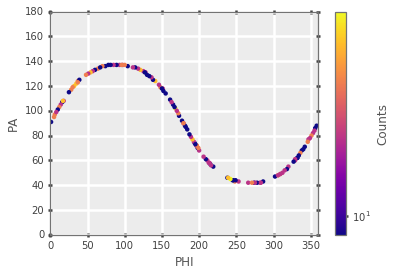

In [8]:
from matplotlib.colors import LogNorm
plt.scatter(X,Y,c=Z, norm=LogNorm())
cb = plt.colorbar()
cb.set_label('Counts')
plt.xlim((0,360))
plt.ylim((0,180))
plt.xlabel('PHI')
plt.ylabel('PA')

[[0.0, 4.565430641174316]]
[[0.0, 10.624039649963379]]
[[0.0, 8.732193946838379]]
[[0.0, 8.459147453308105]]
[[0.0, 3.2353601455688477]]


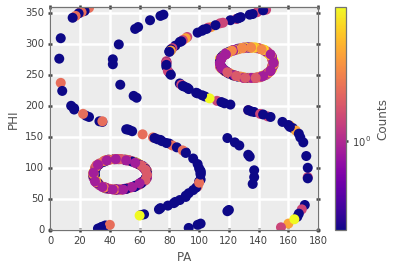

In [9]:
plt.figure()
e_ind=50
for pix in range(5):
    X = d['PA_Ion'][t_ind:t_ind+10,pix,:,e_ind]
    Y = d['PHI_Ion'][t_ind:t_ind+10,pix,:,e_ind]
    Z = d['Counts_H'][t_ind:t_ind+10,pix,:,e_ind]
    from matplotlib.colors import LogNorm
    plt.scatter(X,Y,c=Z, norm=LogNorm(), s=100)
    print(tb.pmm(Z))
cb = plt.colorbar()
cb.set_ticks((1,5,10,20,30))
cb.set_label('Counts')
plt.ylim((0,360))
plt.xlim((0,180))
plt.ylabel('PHI')
plt.xlabel('PA')


[[0.8377211093902588, 4.3296427726745605]]
[[0.0, 9.737059593200684]]
[[0.0, 52.40688705444336]]
[[0.0, 15.53492259979248]]
[[6.181887149810791, 63.90293502807617]]
ENERGY [ 8266.40625  8266.40625  8266.40625  8266.40625  8266.40625  8266.40625
  8266.40625  8266.40625  8266.40625  8266.40625]


(1, 100)

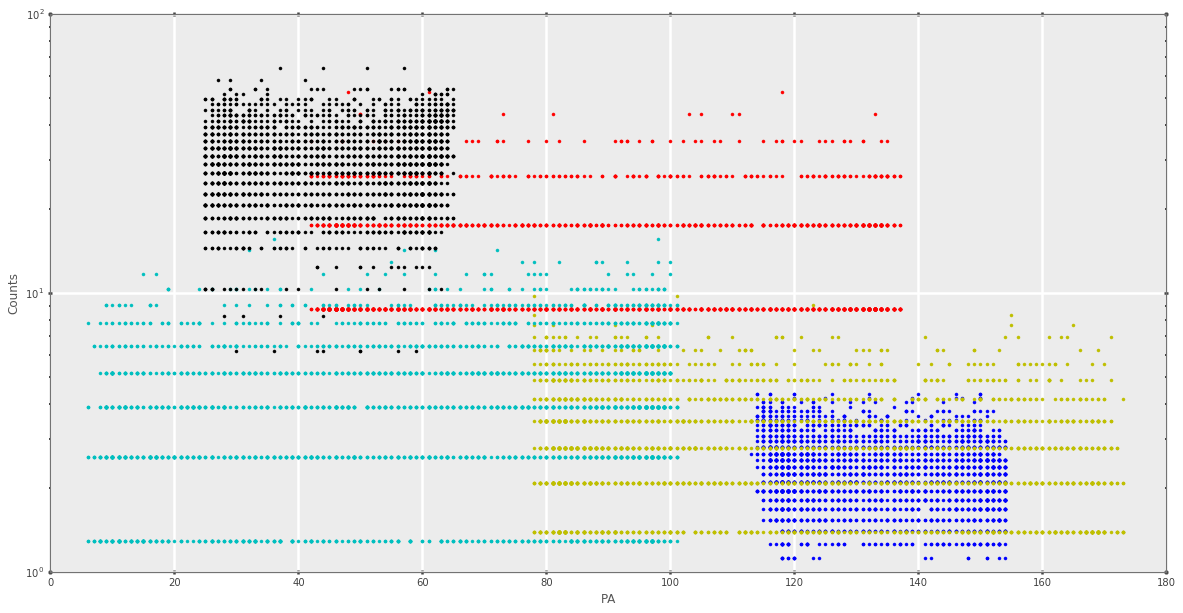

In [40]:
plt.figure(figsize=(20,10))
e_ind=59

delta_t = 200

# for pix in range(5):
#     X = d['PA_Ion'][t_ind:t_ind+10,pix,:,e_ind]
#     Y = d['PHI_Ion'][t_ind:t_ind+10,pix,:,e_ind]
#     Z = d['Counts_H'][t_ind:t_ind+10,pix,:,e_ind]
#     plt.semilogy(X,Z, '.k')
#     print(tb.pmm(Z))
pix =0 
X = d['PA_Ion'][t_ind:t_ind+delta_t,pix,:,e_ind]
Y = d['PHI_Ion'][t_ind:t_ind+delta_t,pix,:,e_ind]
Z = d['Counts_H'][t_ind:t_ind+delta_t,pix,:,e_ind]
plt.semilogy(X,Z, '.b')
print(tb.pmm(Z))

pix =1 
X = d['PA_Ion'][t_ind:t_ind+delta_t,pix,:,e_ind]
Y = d['PHI_Ion'][t_ind:t_ind+delta_t,pix,:,e_ind]
Z = d['Counts_H'][t_ind:t_ind+delta_t,pix,:,e_ind]
plt.semilogy(X,Z, '.y')
print(tb.pmm(Z))

pix =2 
X = d['PA_Ion'][t_ind:t_ind+delta_t,pix,:,e_ind]
Y = d['PHI_Ion'][t_ind:t_ind+delta_t,pix,:,e_ind]
Z = d['Counts_H'][t_ind:t_ind+delta_t,pix,:,e_ind]
plt.semilogy(X,Z, '.r')
print(tb.pmm(Z))

pix =3 
X = d['PA_Ion'][t_ind:t_ind+delta_t,pix,:,e_ind]
Y = d['PHI_Ion'][t_ind:t_ind+delta_t,pix,:,e_ind]
Z = d['Counts_H'][t_ind:t_ind+delta_t,pix,:,e_ind]
plt.semilogy(X,Z, '.c')
print(tb.pmm(Z))

pix =4 
X = d['PA_Ion'][t_ind:t_ind+delta_t,pix,:,e_ind]
Y = d['PHI_Ion'][t_ind:t_ind+delta_t,pix,:,e_ind]
Z = d['Counts_H'][t_ind:t_ind+delta_t,pix,:,e_ind]
plt.semilogy(X,Z, '.k')
print(tb.pmm(Z))


print 'ENERGY', d['HOPE_ENERGY_Ion'][t_ind:t_ind+10,e_ind]
plt.xlim((0,180))
plt.ylabel('Counts')
plt.xlabel('PA')
plt.ylim((1,100))


[[0.0, 52.40688705444336]]
[[0.0, 37.2036247253418]]
[[0.0, 33.85254669189453]]


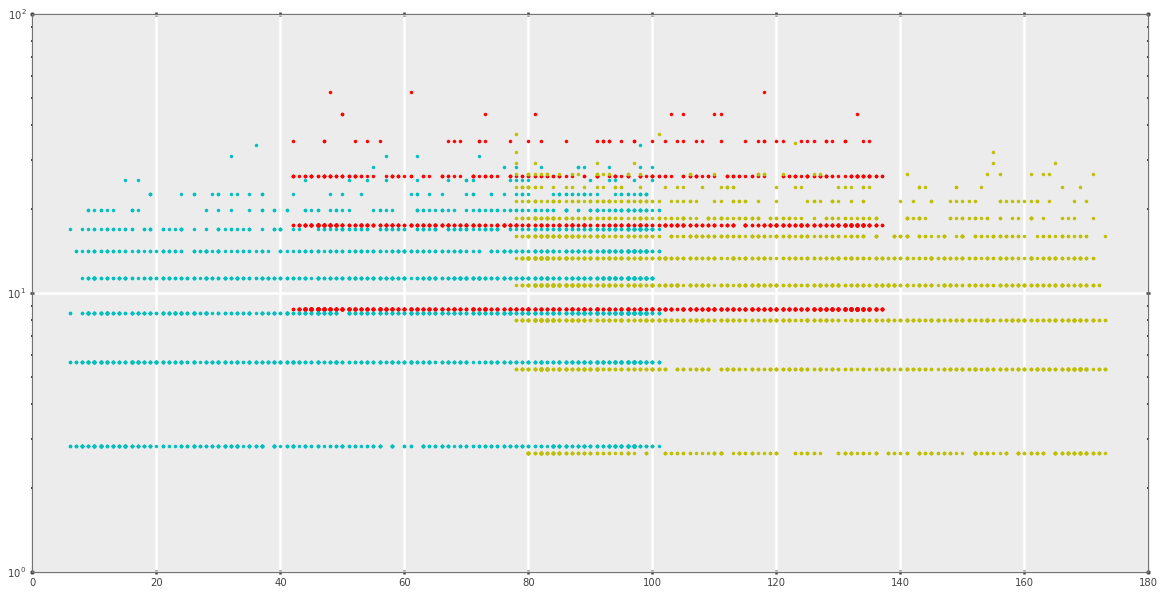

In [11]:
plt.figure(figsize=(20,10))



pix =2 
X = d['PA_Ion'][t_ind:t_ind+delta_t,pix,:,e_ind]
Y = d['PHI_Ion'][t_ind:t_ind+delta_t,pix,:,e_ind]
Z = d['Counts_H'][t_ind:t_ind+delta_t,pix,:,e_ind]
plt.semilogy(X,Z, '.r')
print(tb.pmm(Z))

pix =1 
X = d['PA_Ion'][t_ind:t_ind+delta_t,pix,:,e_ind]
Y = d['PHI_Ion'][t_ind:t_ind+delta_t,pix,:,e_ind]
Z = d['Counts_H'][t_ind:t_ind+delta_t,pix,:,e_ind]
plt.semilogy(X,Z, '.y')
print(tb.pmm(Z))


pix =3 
X = d['PA_Ion'][t_ind:t_ind+delta_t,pix,:,e_ind]
Y = d['PHI_Ion'][t_ind:t_ind+delta_t,pix,:,e_ind]
Z = d['Counts_H'][t_ind:t_ind+delta_t,pix,:,e_ind]
plt.semilogy(X,Z, '.c')
print(tb.pmm(Z))


In [12]:
# grab out the means as a function of PA and balace out the pixels and make the plot again.

In [13]:
deg_per_bin = 5



binned = np.zeros((180//deg_per_bin,5), dtype=float)
binned_sd = np.zeros((180//deg_per_bin,5), dtype=float)
binned_sum = np.zeros((180//deg_per_bin,5), dtype=float)

for pix in range(5):
    db = np.digitize(d['PA_Ion'][t_ind:t_ind+delta_t,pix,:,e_ind], np.arange(0,181,deg_per_bin))
    for ii in range(len(binned)):
        if (db==ii).sum():
            binned[ii,pix] = np.mean(d['Counts_H'][t_ind:t_ind+delta_t,pix,:,e_ind][db==ii])
            binned_sd[ii,pix] = np.std(d['Counts_H'][t_ind:t_ind+delta_t,pix,:,e_ind][db==ii])
            binned_sum[ii,pix] = np.sum([db==ii])

In [14]:
from scipy.optimize import minimize, fminbound, golden, brent


###
# TODO THIS WAS BRIAN'S BY HAND GUESS THAT IS QUITE CLOSE
corrg = (30./35., 30./35., 1, 1, 32./25.)

def min_fn(val, *args):
    p3=args[0]['p3']
    d2=args[0]['d2']
    ind = (p3 > 0) & (d2 > 0)
#     p3 = np.log(p3)
#     s2 = np.log(d2)
#     print ind, tb.medAbsDev(p3[ind]-d2[ind]*val)
    return np.sum(np.abs(p3[ind]-d2[ind]*val))
#     return tb.medAbsDev(p3-d2*val)

corr = {}
for pix in [0,1,2,3,4]:
    if pix == 2:
        corr[pix] = 1
        continue
    # compute the median absolute deviation of each and use this to compute the best answer
    x0 = [corrg[pix]]
    corr[pix] = fminbound(min_fn, 1e-3, 1e3, args=({'p3':binned[:,2], 'd2':binned[:,pix]},), disp=1)
    
#     corr[pix] = minimize(min_fn, x0, args={'p3':binned[:,2], 'd2':binned[:,pix]}, tol=1e-3, bounds=((1e-3, 1e3),))
print corr
corrv = np.asarray([corr[v] for v in corr])
print(corrv, corrv.shape)
print(corrg)

{0: 0.802356148788677, 1: 0.82572352668082782, 2: 1, 3: 0.89469284175287533, 4: 1.2380625159069669}
(array([ 0.80235615,  0.82572353,  1.        ,  0.89469284,  1.23806252]), (5,))
(0.8571428571428571, 0.8571428571428571, 1, 1, 1.28)


(4, 70)

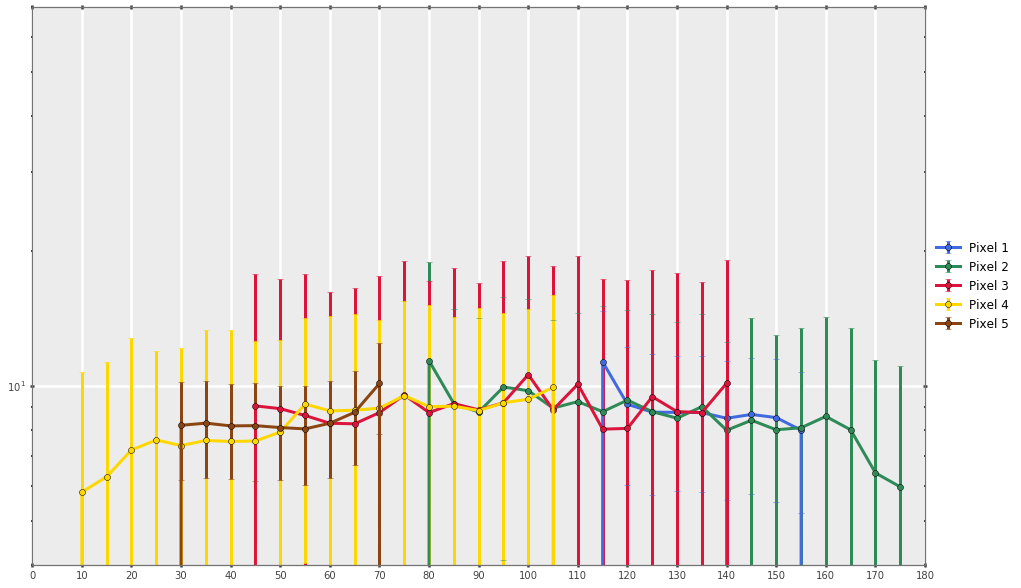

In [15]:

plt.figure(figsize=(20,10))

for pix in range(5):
#     plt.semilogy(np.arange(180), binned[:,pix], label='Pixel {0}'.format(pix+1), lw=3)

    plt.errorbar(np.arange(len(binned))*deg_per_bin, binned[:,pix]*corrv[pix], binned_sd[:,pix], fmt='o-', 
                 label='Pixel {0}'.format(pix+1), lw=3)

plt.yscale('log')
    
ax = plt.gca()
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = plt.xticks(range(0,181,10))

plt.ylim((4,70))

[[0.0, 543.42857142857144]]
[[0.0, 378.85714285714283]]
[[0.0, 344.0]]
[[0.0, 439.0]]
[[0.0, 803.84000000000003]]


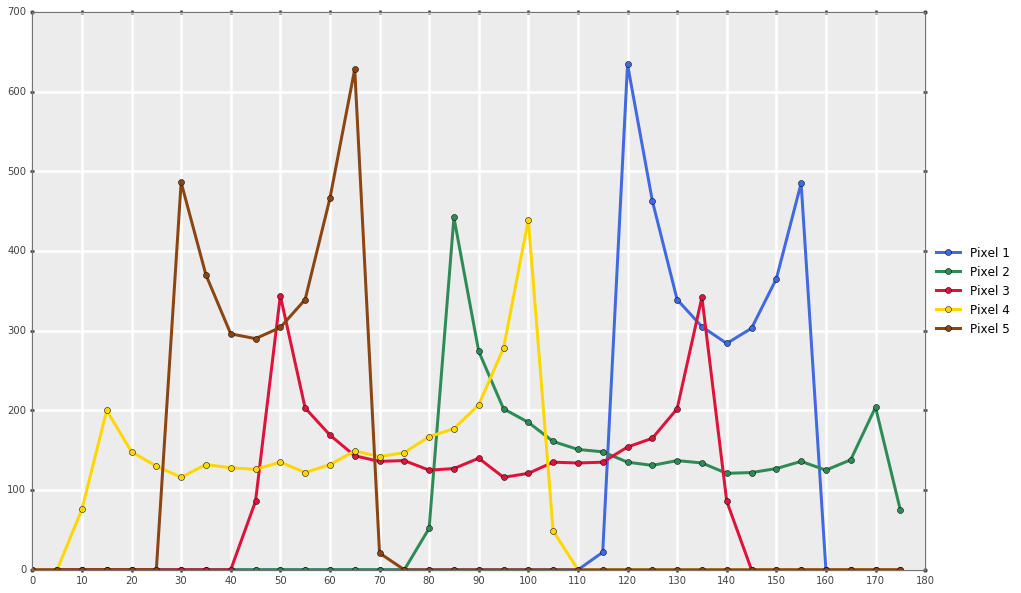

In [16]:
plt.figure(figsize=(20,10))

corr = (30./35., 30./35., 1, 1, 32./25.)

for pix in range(5):
#     plt.semilogy(np.arange(180), binned[:,pix], label='Pixel {0}'.format(pix+1), lw=3)

    plt.plot(np.arange(len(binned))*deg_per_bin, binned_sum[:,pix], 'o-', label='Pixel {0}'.format(pix+1), 
                 lw=3)#, yerr=binned_sd[:,pix])
    print(tb.pmm(binned_sum[:,pix]*corr[pix]))

plt.yscale('linear')
    
ax = plt.gca()
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = plt.xticks(range(0,181,10))
# plt.ylim((0,))

In [17]:
binned2 = np.zeros((180//deg_per_bin), dtype=float)
binned2_sd = np.zeros((180//deg_per_bin), dtype=float)
binned2_sum = np.zeros((180//deg_per_bin), dtype=float)
binned2_wei = np.zeros((180//deg_per_bin), dtype=float)

dtmp = d['Counts_H'][t_ind:t_ind+delta_t,:,:,e_ind]

print('dtmp -- mult', dtmp.shape)
print('corrv', corrv)
for pix in range(5):
    dtmp[:,pix,:] *= corrv[pix]
print('dtmp', dtmp.shape)
dtmp = dtmp.flatten()
print( 'dtmp', dtmp.shape)
# dtmp = np.swapaxes(dtmp, 1,2)
# print( 'dtmp', dtmp.shape)
# dtmp = dtmp.reshape(-1,5)
# print( 'dtmp', dtmp.shape)



digis = np.zeros(len(dtmp))
# digis_w = np.zeros_like(digis)
# for pix in range(5):
#     digis[:,pix] = np.digitize(d['PA_Ion'][t_ind:t_ind+delta_t,pix,:,e_ind].flatten(), np.arange(0,181,2))
digis = np.digitize(d['PA_Ion'][t_ind:t_ind+delta_t,:,:,e_ind].flatten(), np.arange(0,181,deg_per_bin))


print('digis', digis.shape)
print('binned2_sum', binned2_sum.shape)
digis = digis.flatten()
print('digis', digis.shape)




for ii in range(len(binned2)):
    if (digis==ii).sum(): # at least one point
        binned2[ii] = np.mean(dtmp[digis==ii])
        binned2_sd[ii] = np.std(dtmp[digis==ii])
        binned2_sum[ii] = np.sum([digis==ii])

        
            
print(binned2)


('dtmp -- mult', (200, 5, 16))
('corrv', array([ 0.80235615,  0.82572353,  1.        ,  0.89469284,  1.23806252]))
('dtmp', (200, 5, 16))
('dtmp', (16000,))
('digis', (16000,))
('binned2_sum', (36,))
('digis', (16000,))
[ 0.          0.          5.80922297  6.2819751   7.21084265  7.5880681
  8.02580429  8.0870658   7.96759551  8.16032452  8.41748733  8.40680888
  8.36110977  8.682873    8.92842679  9.54294554  9.26608418  9.11622534
  8.80210849  9.44620714  9.65895816  9.04957824  9.64381253  8.62435803
  8.96352968  8.91292639  8.69985251  8.77887612  8.65040455  8.57718865
  8.37737392  8.00174948  8.5624707   7.99413709  6.40742642  5.96533773]


(1, 100)

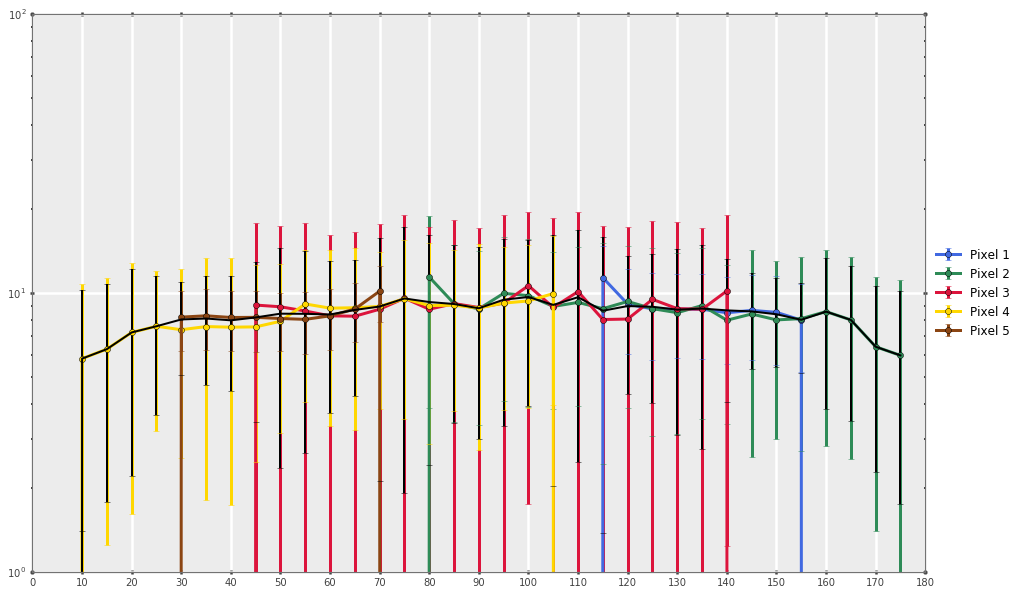

In [33]:


plt.figure(figsize=(20,10))

for pix in range(5):
#     plt.semilogy(np.arange(180), binned[:,pix], label='Pixel {0}'.format(pix+1), lw=3)

    plt.errorbar(np.arange(len(binned))*deg_per_bin, binned[:,pix]*corrv[pix], binned_sd[:,pix], 
                 fmt='o-', label='Pixel {0}'.format(pix+1), lw=3)

plt.yscale('log')
    
ax = plt.gca()
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = plt.xticks(range(0,181,10))

# plt.ylim((4,70))

plt.errorbar(np.arange(len(binned2))*deg_per_bin, binned2, binned2_sd, lw=2, c='k')
plt.xlim((0,180))
plt.ylim((1,100))

# plt.semilogy(np.arange(len(binned2))*2, binned2, lw=5, c='k')

# Try pymc

In [19]:
import pymc

In [20]:
print("There are {0} bins".format(len(dtmp[digis==ii])))
mu = pymc.Uniform('mu', 0,1e6)
poi = pymc.Poisson('poi', mu=mu, observed=True, value=dtmp[digis==ii]) # this is the last bin

There are 75 bins


In [21]:
model = pymc.MCMC((mu,poi))

In [22]:
model.sample(1e5, burn_till_tuned=True, verbose=1)

burn_til_tuned is True. tune_throughout is set to False
	Tuning at iteration 1000
	Metropolis_mu tuning:
		value: 75.1313015491
		acceptance rate: 0.009
		adaptive scale factor: 0.5

	Tuning at iteration 2000
	Metropolis_mu tuning:
		value: 75.1313015491
		acceptance rate: 0.0
		adaptive scale factor: 0.05

	Tuning at iteration 3000
	Metropolis_mu tuning:
		value: 75.1313015491
		acceptance rate: 0.0
		adaptive scale factor: 0.005

	Tuning at iteration 4000
	Metropolis_mu tuning:
		value: 9.91352010074
		acceptance rate: 0.002
		adaptive scale factor: 0.0025

	Tuning at iteration 5000
	Metropolis_mu tuning:
		value: 7.60791213802
		acceptance rate: 0.001
		adaptive scale factor: 0.00125

	Tuning at iteration 6000
	Metropolis_mu tuning:
		value: 6.09586020108
		acceptance rate: 0.002
		adaptive scale factor: 0.000625

	Tuning at iteration 7000
	Metropolis_mu tuning:
		value: 6.016409867
		acceptance rate: 0.001
		adaptive scale factor: 0.0003125

	Tuning at iteration 8000
	Metropolis_mu

Plotting mu
{'mu': {'95% HPD interval': array([ 4.99941999,  6.06351506]), 'n': 100000, 'quantiles': {2.5: 5.0137528701189975, 25: 5.3487726925399324, 50: 5.5268711743798979, 75: 5.7145088515248625, 97.5: 6.081631501333348}, 'standard deviation': 0.27132570051723226, 'mc error': 0.0021282317905145379, 'mean': 5.5334042761259168}}


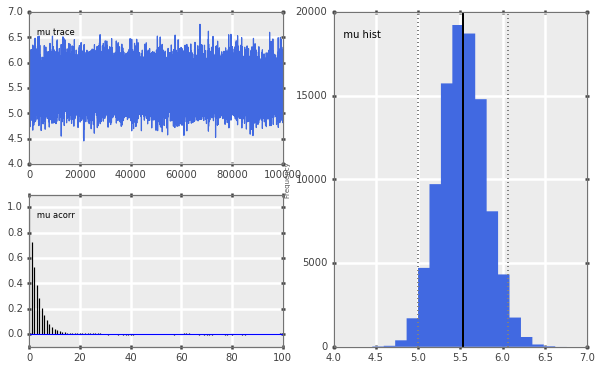

In [23]:
pymc.Matplot.plot(model)
print(model.stats())

In [24]:
print(model.stats()['mu']['mean'])
print(model.stats()['mu']['95% HPD interval'])

5.53340427613
[ 4.99941999  6.06351506]


## This worked and gave a pretty good result.
For the heck of it lets use the data for each PA bin and MCMC to get results

('dtmp -- mult', (200, 5, 16))
('corrv', array([ 0.80235615,  0.82572353,  1.        ,  0.89469284,  1.23806252]))
('dtmp', (200, 5, 16))
('dtmp', (16000,))
('digis', (16000,))
('binned3_sum', (36,))
('digis', (16000,))

3 36
There are 76 bins
 [----------------------------------190%----------------------------------] 28536 of 15000 complete in 1.5 sec
4 36
There are 200 bins
 [---------------------------------------------------------310%---------------------------------------------------------] 46647 of 15000 complete in 2.5 sec
5 36
There are 148 bins
 [---------------------------------------------252%----------------------------------------------] 37819 of 15000 complete in 2.0 sec
6 36
There are 130 bins
 [-------------------------------------210%--------------------------------------] 31516 of 15000 complete in 1.5 sec
7 36
There are 602 bins
 [------------------------------------------------264%------------------------------------------------] 39745 of 15000 complete in 3.0 sec
8

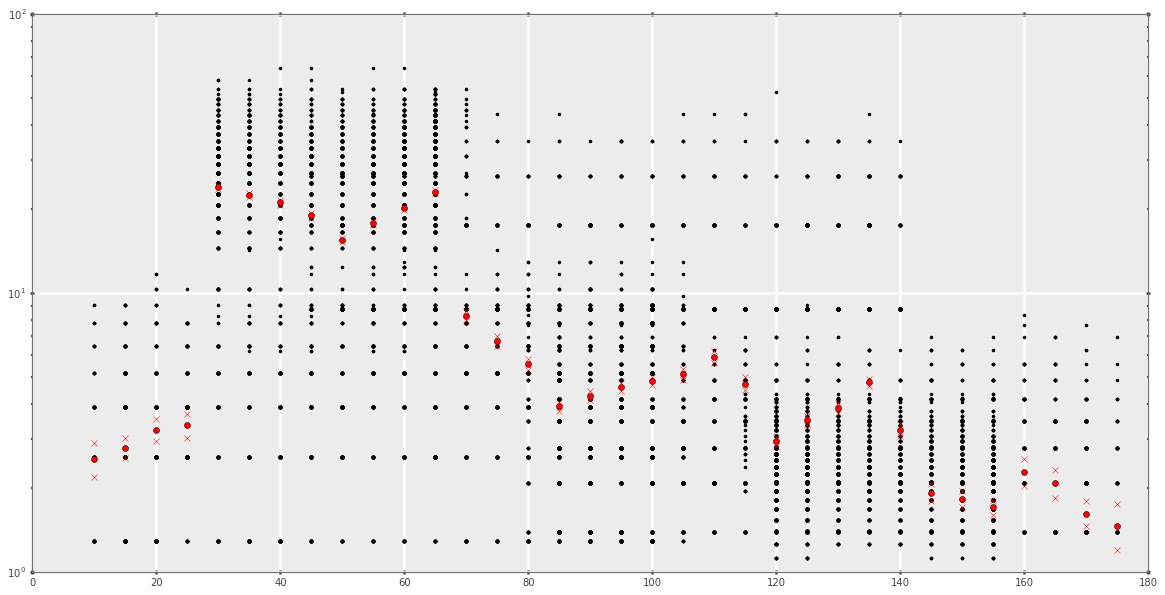

In [38]:
plt.figure(figsize=(20,10))


binned3 = np.zeros((180//deg_per_bin), dtype=float)
binned3_sd = np.zeros((180//deg_per_bin), dtype=float)
binned3_sum = np.zeros((180//deg_per_bin), dtype=float)
binned3_wei = np.zeros((180//deg_per_bin), dtype=float)

binned3_mc_mean = np.zeros((180//deg_per_bin), dtype=float)
binned3_mc_ci = np.zeros((180//deg_per_bin,2), dtype=float)


dtmp = d['Counts_H'][t_ind:t_ind+delta_t,:,:,e_ind]

print('dtmp -- mult', dtmp.shape)
print('corrv', corrv)
for pix in range(5):
    dtmp[:,pix,:] *= corrv[pix]
print('dtmp', dtmp.shape)
dtmp = dtmp.flatten()
print( 'dtmp', dtmp.shape)

digis = np.zeros(len(dtmp))
# digis_w = np.zeros_like(digis)
# for pix in range(5):
#     digis[:,pix] = np.digitize(d['PA_Ion'][t_ind:t_ind+delta_t,pix,:,e_ind].flatten(), np.arange(0,181,2))
digis = np.digitize(d['PA_Ion'][t_ind:t_ind+delta_t,:,:,e_ind].flatten(), np.arange(0,181,deg_per_bin))


print('digis', digis.shape)
print('binned3_sum', binned3_sum.shape)
digis = digis.flatten()
print('digis', digis.shape)

for ii in range(len(binned3)):
    if (digis==ii).sum(): # at least one point
        print('\n{0} {1}'.format(ii+1, len(binned3)))
        binned3[ii] = np.mean(dtmp[digis==ii])
        binned3_sd[ii] = np.std(dtmp[digis==ii])
        binned3_sum[ii] = np.sum([digis==ii])
        # setup and run MCMC at each bin, collect up the mean and the 95 percentile
        print("There are {0} bins".format(len(dtmp[digis==ii])))
        mu = pymc.Uniform('mu', 0,1e6)
        poi = pymc.Poisson('poi', mu=mu, observed=True, value=dtmp[digis==ii]) # this is the last bin
        model = pymc.MCMC((mu,poi))
        model.sample(1e4, burn_till_tuned=True, verbose=0)    
        binned3_mc_mean[ii] = model.stats()['mu']['mean']
        binned3_mc_ci[ii] = model.stats()['mu']['95% HPD interval']
        tmp_ = dtmp[digis==ii]
        plt.plot([ii*deg_per_bin]*len(tmp_), tmp_, '.', c='k')
        plt.plot(ii*deg_per_bin, binned3_mc_mean[ii], 'o', c='r')
        plt.plot([ii*deg_per_bin]*2, binned3_mc_ci[ii], 'x', c='r')
        
    
plt.xlim((0,180))
plt.ylim((1,100))
plt.yscale('log')



(1, 100)

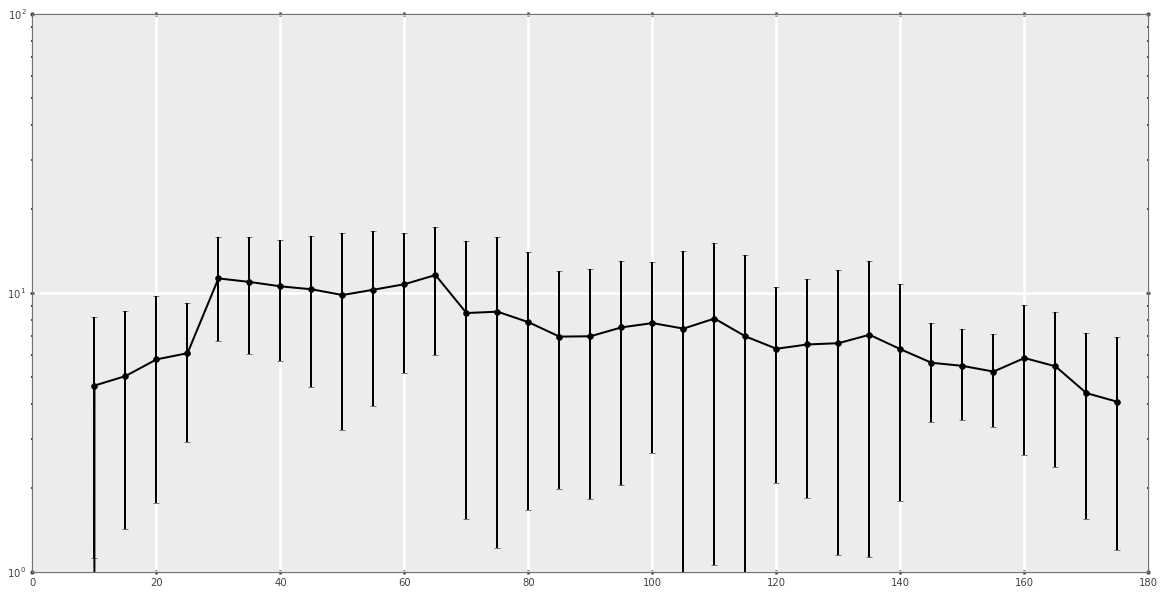

In [32]:


plt.figure(figsize=(20,10))

# plt.errorbar(np.arange(len(binned))*deg_per_bin, binned3_mc_mean, binned3_mc_ci.T, 
#              fmt='o-', label='Pixel {0}'.format(pix+1), lw=3)

# plt.yscale('log')
    
# ax = plt.gca()
# # Shrink current axis by 20%
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# # Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# _ = plt.xticks(range(0,181,10))

# # plt.ylim((4,70))

plt.errorbar(np.arange(len(binned3))*deg_per_bin, binned3, binned3_sd, lw=2, c='k', fmt='o-')
plt.xlim((0,180))
plt.yscale('log')
plt.ylim((1,100))
# plt.semilogy(np.arange(len(binned2))*2, binned2, lw=5, c='k')

(1, 100)

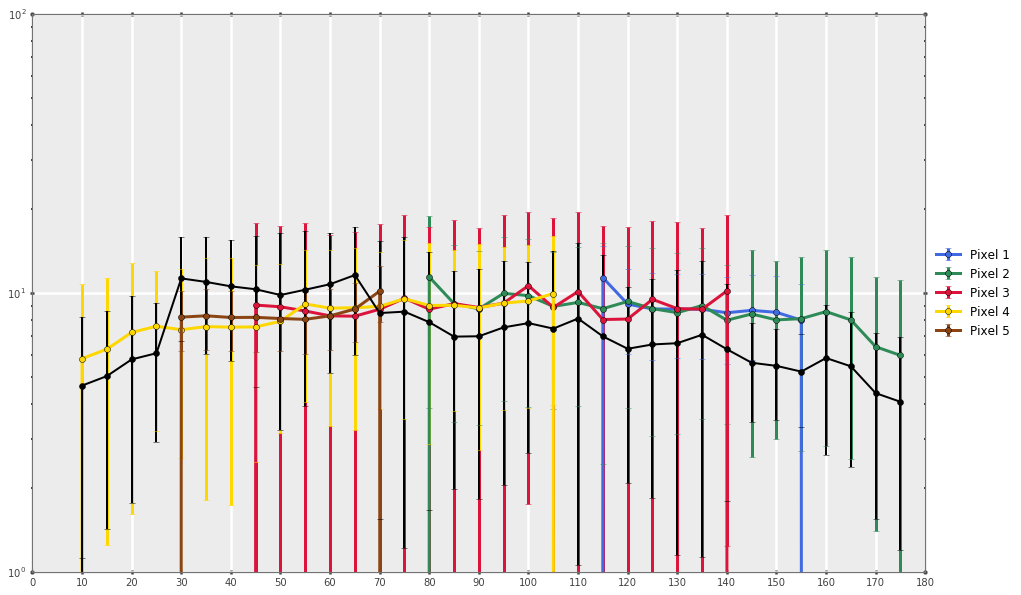

In [34]:


plt.figure(figsize=(20,10))

for pix in range(5):
#     plt.semilogy(np.arange(180), binned[:,pix], label='Pixel {0}'.format(pix+1), lw=3)

    plt.errorbar(np.arange(len(binned))*deg_per_bin, binned[:,pix]*corrv[pix], binned_sd[:,pix], 
                 fmt='o-', label='Pixel {0}'.format(pix+1), lw=3)

plt.yscale('log')
    
ax = plt.gca()
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = plt.xticks(range(0,181,10))

# plt.ylim((4,70))

plt.errorbar(np.arange(len(binned3))*deg_per_bin, binned3, binned3_sd, lw=2, c='k', fmt='o-')
plt.xlim((0,180))
plt.ylim((1,100))

# plt.semilogy(np.arange(len(binned2))*2, binned2, lw=5, c='k')

# Maybe they need to be balanced in a different way


In [39]:
from scipy.optimize import minimize, fminbound, golden, brent

